# Basilico Nature Communication Paper
## Xiaonan Wang
## 02Feb2020

## Introduction

This is to reproduce the figures used in the Basilico nature communication paper.

Please be aware that to keep all results consistent, we saved all the required R RDS objects as we renormalised and recalculated highly variable genes if cells change.

In the main content, there are 3 main SCD objects that were generated using bglab R package that can be downloaded from https://github.com/wjawaid/bglab. The saved R SCD objects included:
1. scd1.rds: 166 cells
2. scd2.rds: 143 cells
3. scd3.rds: 79 cells
The saved DESeq2 results included:
1. DEres_IL3_MLLENL1vsParental.rds

In the supplementery, there are 6 SCD objects saved.
The saved R SCD objects included:
1. scd_sub1.rds: 93 cells
2. scd_sub2.rds: 176 cells
3. scd_sub3.rds: 137 cells
4. scd_sub4.rds: 128 cells
5. scd_sub5.rds: 157 cells
6. scd_sub6.rds: 402 cells
The saved umap coordinates included:
1. umap_scd_sub1.rds
2. umap_scd_sub2.rds
3. umap_scd_sub3.rds

The SCD objects can be regenerated using bglab R package. The results will not be exactly the same but very similar.

In total, there are 1000 cells. All the required files can be downloaded from ./Data/newscd.tar.gz.

In [64]:
#### Load required packages
library(repr);
library(gplots);
library(fields);
library(bglab);
library(batchelor)

#### Load source R code
source('NC_Silvia_source.R')

## Main figures

### Figure 2Bi

In [9]:
scd1 <- readRDS('./newscd/scd1.rds')

Warning message:
“'pc.input=TRUE' and 'use.dimred=TRUE' are deprecated.
Use 'reducedMNN' instead.”


[1] "ME-Parental"     "ME-Preleukaemia" "MLLENL-BM"       "Parental"       


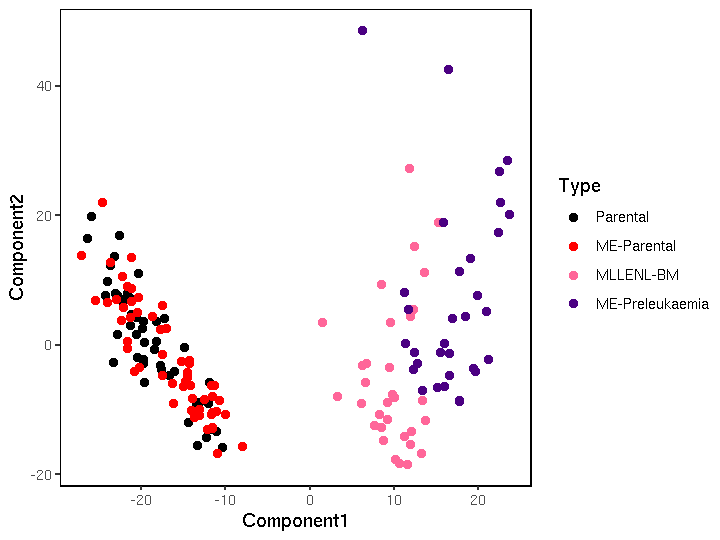

In [41]:
options(repr.plot.width=6, repr.plot.height=4.5)

idxB1 <- pData(scd1)$Batch=="B1"
idxB2 <- pData(scd1)$Batch=="B2"
pca45_4_new <- scd1@pca@eigenvectors[idxB1,1:20] 
pca45_5_new <- scd1@pca@eigenvectors[idxB2,1:20] 

new_pca <- fastMNN(pca45_5_new, pca45_4_new, k = 5, pc.input = TRUE)
clvs <- levels(as.factor(as.character(pData(scd1)$Combined)))
print(clvs)
p <- plotPCA1(scd1, reduceMethod = "none", Co=new_pca$corrected, lv=clvs[c(4,1,3,2)], colorby="Combined", point.size = 2, theme = "bw")
p <- p + scale_color_manual(values=c("black", "red", "#ff6699", "#4B0082")) 
p

### Figure 2Bii

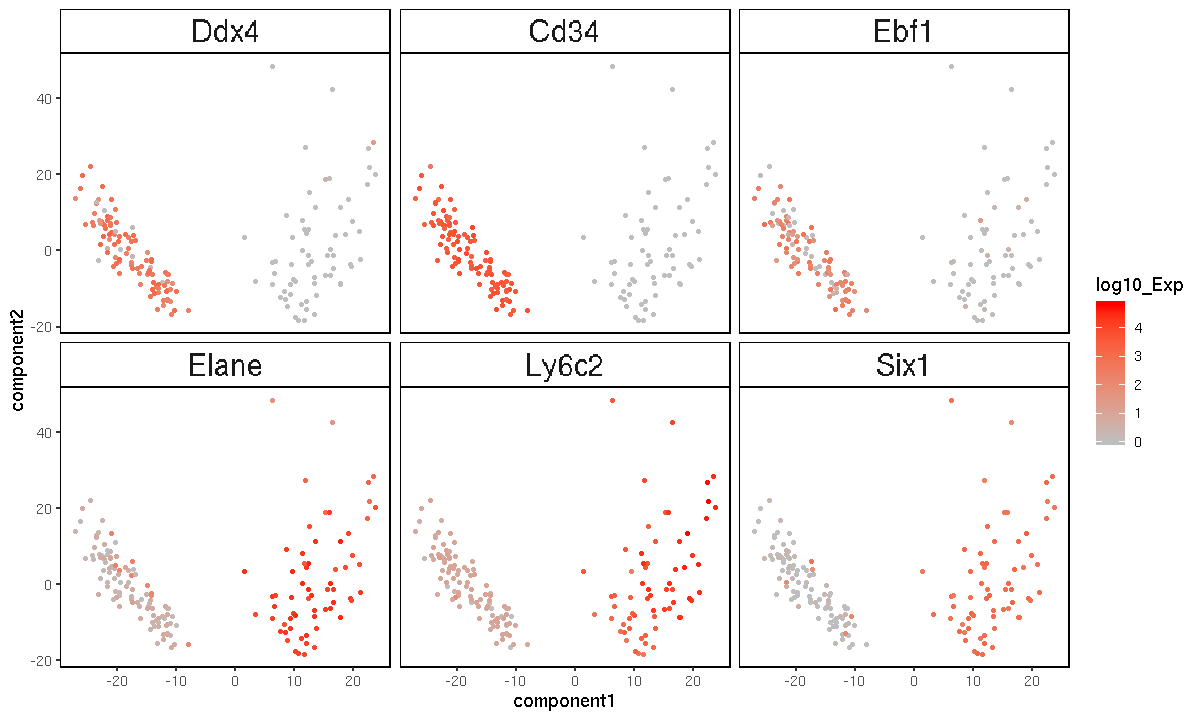

In [156]:
options(repr.plot.width=10, repr.plot.height=6)
geneIDs <- c("Ddx4", "Cd34", "Ebf1", "Elane", "Ly6c2", "Six1")
p <- plotGene1(scd1, reduceMethod = "none", Co=new_pca$corrected, gene = geneIDs, ncol=3, theme="bw", point.size = 1)
p <- p + theme(strip.text=element_text(size=18))
p

### Figure 2D

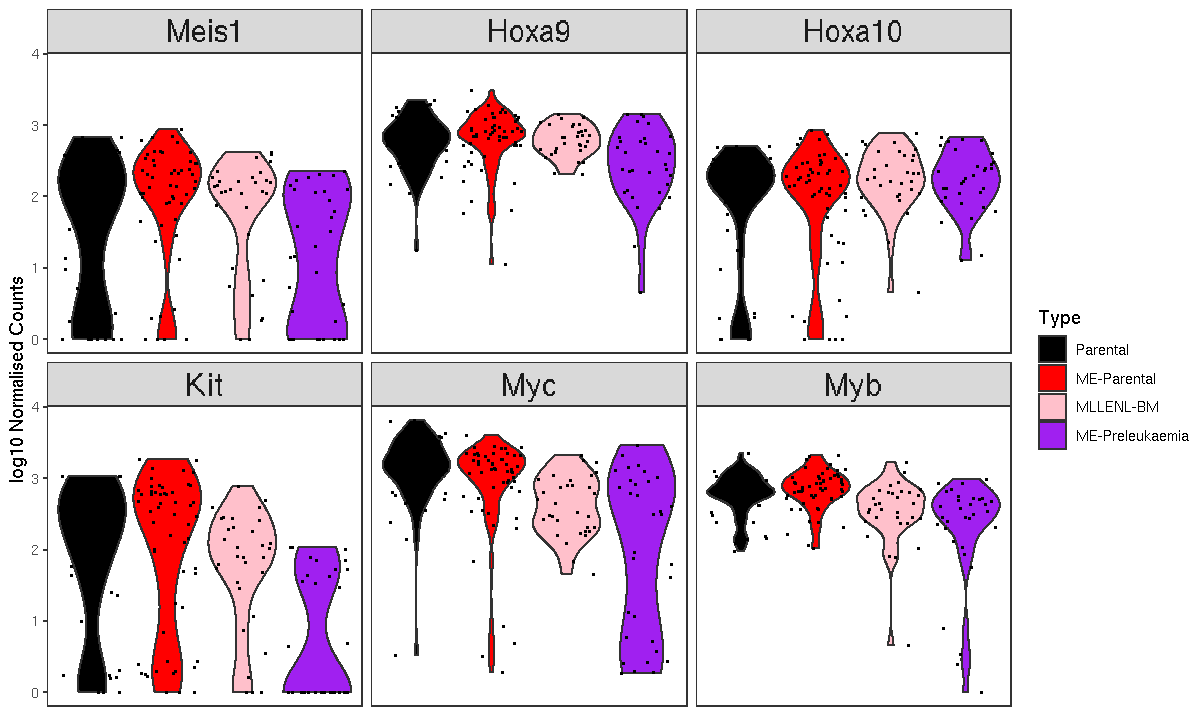

In [154]:
options(repr.plot.width=10, repr.plot.height=6)
geneIDs <- c("Meis1", "Hoxa9", "Hoxa10", "Kit", "Myc", "Myb")
geneExp <- getExp(scd1, id=geneIDs)
colnames(geneExp)<- as.factor(as.character(pData(scd1)$Combined))

p <- ggviolinplot(geneExp, ncol=3, scale="width")
p <- p + scale_fill_manual(values=c("black", "red", "pink", "purple"))+theme_bw() + theme(panel.grid = element_blank(), axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(),strip.text=element_text(size=18))
p

### Figure 4Bi

In [48]:
scd3 <- readRDS('./newscd/scd3.rds')

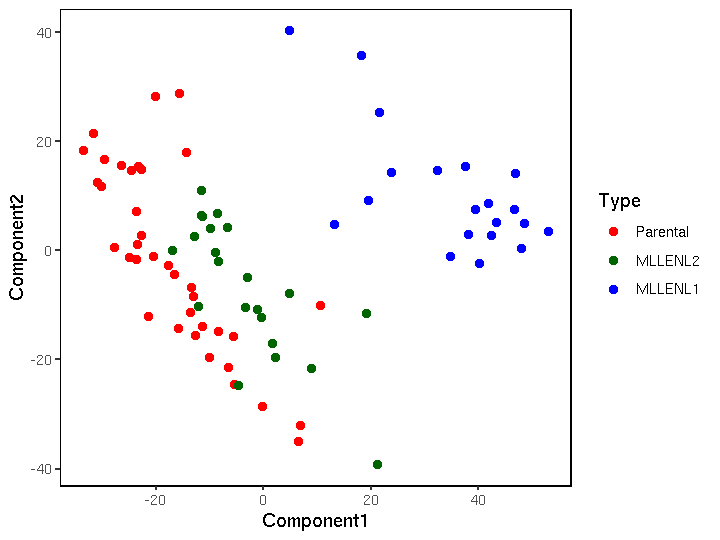

In [55]:
options(repr.plot.width=6, repr.plot.height=4.5)

p <- plotPCA1(scd3, colorby = "SubType", point.size = 2, theme = "bw", lv=c("Parental", "MLLENL2", "MLLENL1"))
p <- p + scale_color_manual(values=c("red", "dark green", "blue")) 
p

### Figure 4Bii

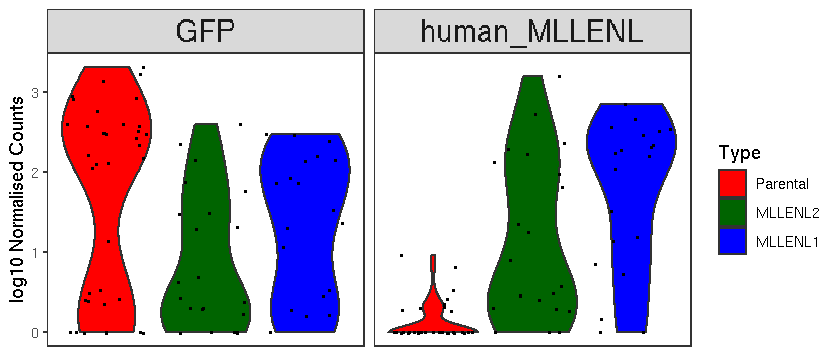

In [153]:
options(repr.plot.width=7, repr.plot.height=3)

geneIDs <- c("GFP", "human_MLLENL") 
gExp <- getExp(scd=scd3, id=geneIDs)
colnames(gExp) <- pData(scd3)$SubType

p <- ggviolinplot(gExp, ncol=4, lv=c("Parental", "MLLENL2", "MLLENL1"), scale="width")
p <- p + scale_fill_manual(values=c("red", "dark green", "blue"))
p <- p + theme_bw() + theme(panel.grid = element_blank(), axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(), strip.text=element_text(size=18))
p

### Figure 4Cii

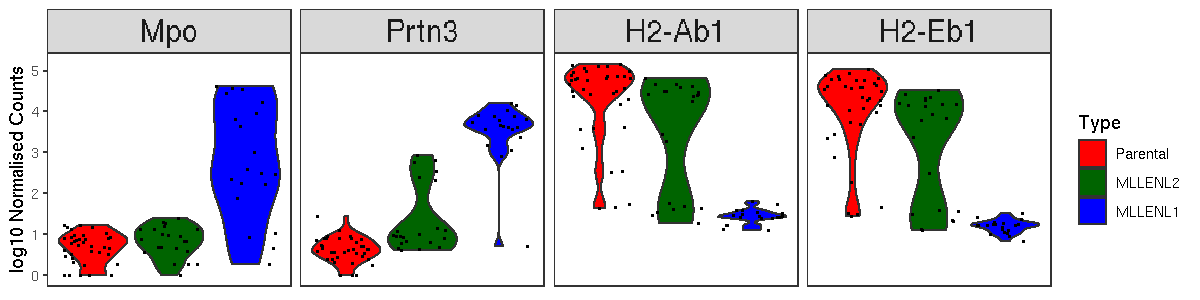

In [152]:
options(repr.plot.width=10, repr.plot.height=2.5)

geneIDs <- c("Mpo", "Prtn3", "H2-Ab1", "H2-Eb1")
gExp <- getExp(scd=scd3, id=geneIDs)
colnames(gExp) <- pData(scd3)$SubType

p <- ggviolinplot(gExp, ncol=4, lv=c("Parental", "MLLENL2", "MLLENL1"), scale="width")
p <- p + scale_fill_manual(values=c("red", "dark green", "blue"))
p <- p + theme_bw() + theme(panel.grid = element_blank(), axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(), strip.text=element_text(size=18))
p

### Figure 4Di

[1] "c1" "c2" "c3"
[1] 3
[1] "MLLENL1"  "MLLENL2"  "Parental"
[1] 3


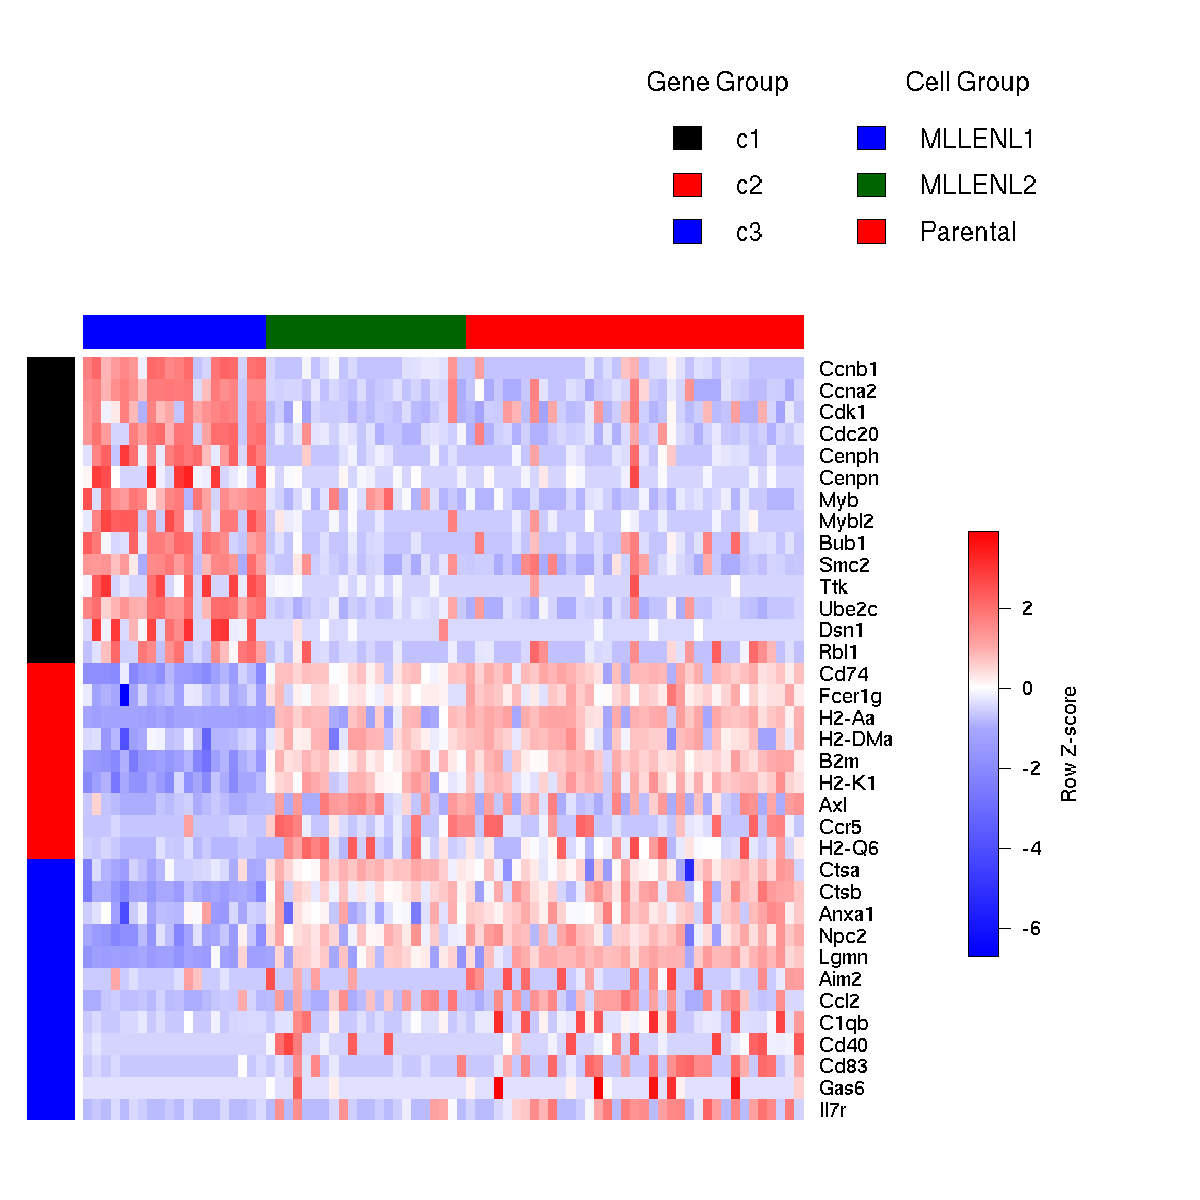

In [108]:
options(repr.plot.width=10, repr.plot.height=10)

cl1 <- c("Ccnb1", "Ccna2", "Cdk1", "Cdc20", "Cenph", "Cenpn", "Myb", "Mybl2", "Bub1", "Smc2", "Ttk", "Ube2c", "Dsn1", "Rbl1")
cl2 <- c("Cd74", "Fcer1g", "H2-Aa", "H2-DMa", "B2m", "H2-K1", "Axl", "Ccr5", "H2-Q6")
cl3 <- c("Ctsa", "Ctsb", "Anxa1", "Npc2", "Lgmn", "Aim2", "Ccl2", "C1qb", "Cd40", "Cd83", "Gas6", "Il7r")

g1 <- as.character(pData(scd3)$SLX[pData(scd3)$SubType == "MLLENL1"])
g2 <- as.character(pData(scd3)$SLX[pData(scd3)$SubType == "MLLENL2"])
g3 <- as.character(pData(scd3)$SLX[pData(scd3)$SubType == "Parental"])

geneExp <- getExp(scd3, id=c(cl1,cl2,cl3), cell = c(g1, g2, g3))
colnames(geneExp) <- c(rep("MLLENL1", length(g1)), rep("MLLENL2", length(g2)), rep("Parental", length(g3)))
new_d <- ScalebyRow(geneExp)
bk <- c(seq(min(new_d),-1,length.out=100), seq(-0.99,1,length.out=100), seq(1.01, max(new_d), length.out=100))
rcol <- c(rep("c1", length(cl1)), rep("c2", length(cl2)), rep("c3", length(cl3)))
rcol <- generate_colour(rcol, col=c("black", "red", "blue"))
ccol <- generate_colour(colnames(geneExp),col=c("blue", "dark green", "red"))

heatmap.2(new_d,lwid=c(0.1,4),cexRow=1.5, breaks=bk, labCol = "", margins=c(5,25), key=FALSE, labRow=c(cl1, cl2, cl3),trace="none", Colv=FALSE, Rowv=FALSE, dendrogram="none", RowSideColors = rcol$Colours, ColSideColors = ccol$Colours,col=colorRampPalette(c("blue", "white", "red"))(299))
par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n")
legend(x=0.4, y=1, title="Cell Group", xpd=TRUE, legend=ccol$Legend, fill=ccol$Colour_level, cex=1.3, bty="n")
legend(x=0, y=1, title="Gene Group", xpd=TRUE, legend=rcol$Legend, fill=rcol$Colour_level, cex=1.3, bty="n")
par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 3), mar = c(6, 0, 14, 0)+0.1, new = TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", xlab=NA, ylab=NA)
image.plot(zlim=range(new_d), breaks=bk, col=colorRampPalette(c("blue", "white", "red"))(299), legend.only=T, legend.args=list(text="Row Z-score", side=4, line=2.5))

### Figure 4Dii

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



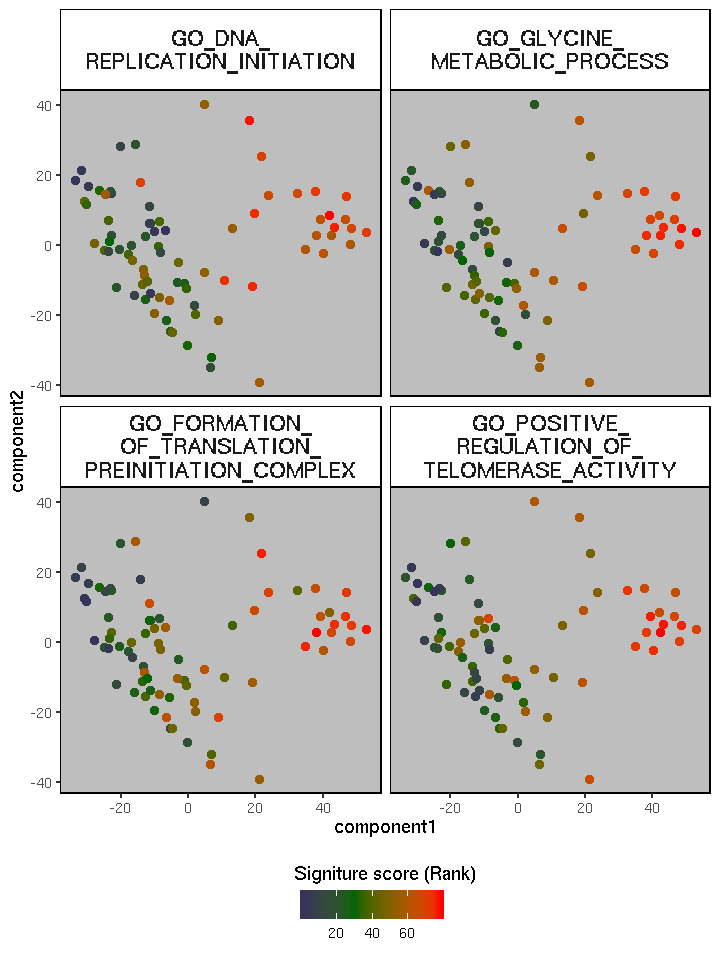

In [158]:
options(repr.plot.width=6, repr.plot.height=8)
fp_result <- t(read.csv("./newscd/fastproject_Results.csv")[,3:20])
colnames(fp_result) <- pData(scd3)$SLX
rownames(fp_result) <- sapply(rownames(fp_result), function(x) sepWord(x, width=2))
fp_result1 <- t(apply(fp_result, 1, function(x) rank(x, ties.method="max")))

p <- plotGene1(scd3, gene=as.data.frame(t(fp_result1[c(2,3,14,5),])), ncol=2, theme="bw")
p <- p + scale_colour_gradient2(low="dark blue", mid="dark green", high="red", midpoint=30)
p <- p + theme(panel.background = element_rect(fill="grey"), strip.text=element_text(size=13), legend.position="bottom", legend.direction = "horizontal")
p <- p + labs(color="Signiture score (Rank)")     
p <- p + guides(colour = guide_colourbar(title.position="top", title.hjust = 0.5))
p

### Figure 4Ei

In [137]:
scd2 <- readRDS('./newscd/scd2.rds')

Warning message:
“'pc.input=TRUE' and 'use.dimred=TRUE' are deprecated.
Use 'reducedMNN' instead.”


[1] "IL3_Day7_MLL-ENL1" "IL3_Day7_MLL-ENL2" "IL3_Day7_Parental"
[4] "ME-Preleukaemia"   "MLLENL-BM"        


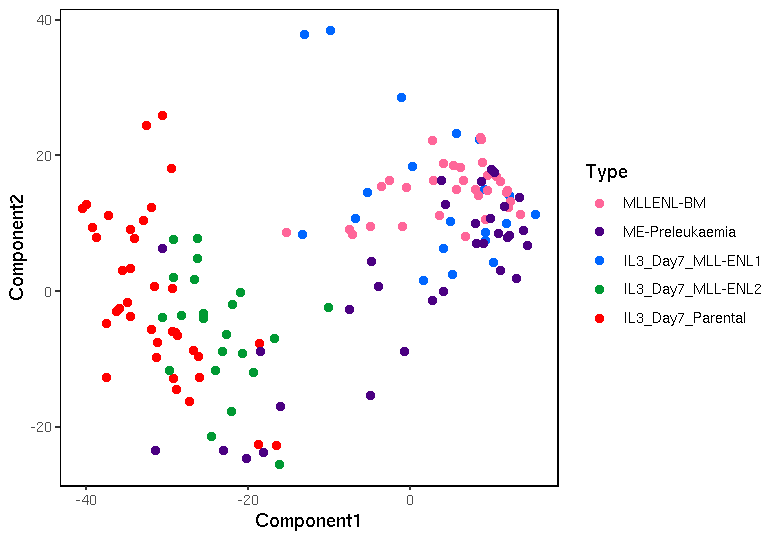

In [146]:
options(repr.plot.width=6.5, repr.plot.height=4.5)

idx1 <- pData(scd2)$Batch=="B2"
idx2 <- pData(scd2)$Batch=="B1"
pca_f1 <- scd2@pca@eigenvectors[idx1,1:20]
pca_f2 <- scd2@pca@eigenvectors[idx2,1:20]
pca_f3 <- fastMNN(pca_f1, pca_f2, k = 5, pc.input = TRUE)
clvs <- levels(as.factor(as.character(pData(scd2)$Combined)))
print(clvs)

p <- plotPCA1(scd2, Co=pca_f3$corrected, colorby="Combined", theme = "bw", lv=clvs[c(5,4,1,2,3)])
p <- p + scale_color_manual(values=c("#ff6699", "#4B0082", "#0066ff", "#009933", "red")) 
p

### Figure 4Eii

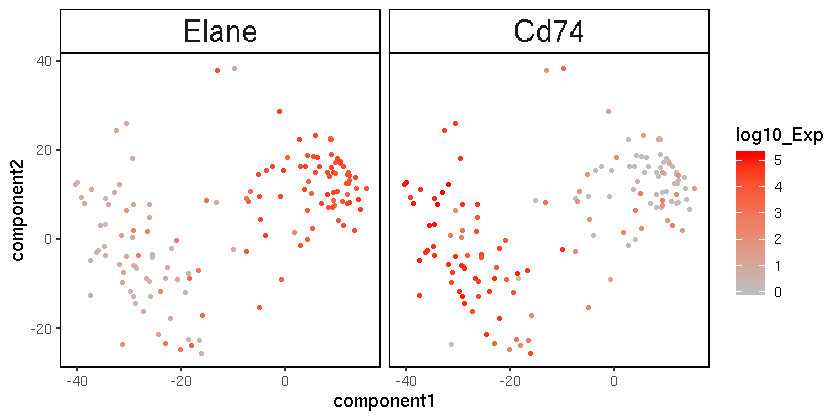

In [160]:
options(repr.plot.width=7, repr.plot.height=3.5)
geneIDs <- c("Elane", "Cd74")
p <- plotGene1(scd2, reduceMethod = "none", Co=pca_f3$corrected, gene = geneIDs, ncol=3, theme="bw", point.size = 1)
p <- p + theme(strip.text=element_text(size=18))
p

### Figure 4Eiii

[1] "IL3_Day7_MLL-ENL1" "IL3_Day7_MLL-ENL2" "IL3_Day7_Parental"
[4] "ME-Preleukaemia"   "MLLENL-BM"        


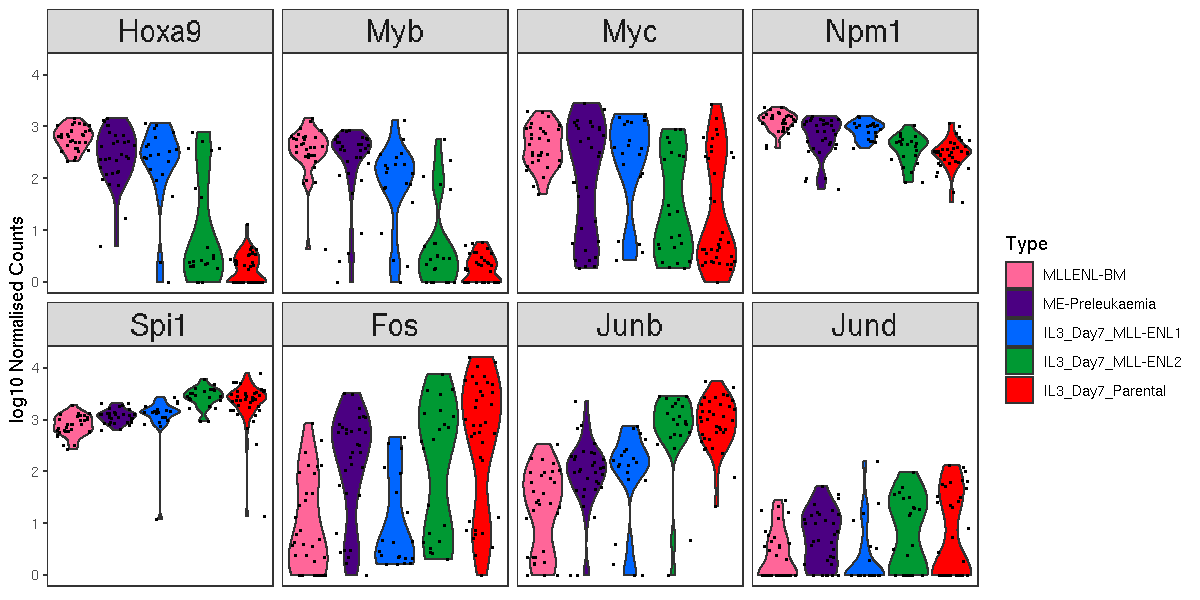

In [166]:
options(repr.plot.width=10, repr.plot.height=5)
geneIDs <- c("Hoxa9", "Myb", "Myc", "Npm1", "Spi1", "Fos", "Junb", "Jund")

geneExp <- getExp(scd2, id=geneIDs)
colnames(geneExp) <- pData(scd2)$Combined
clvs <- levels(as.factor(as.character(pData(scd2)$Combined)))
print(clvs)

p <- ggviolinplot(geneExp, ncol=4, scale="width", lv=clvs[c(5,4,1,2,3)])+theme_bw() + theme(panel.grid = element_blank(), axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(), strip.text=element_text(size=18))
p <- p + scale_fill_manual(values=c("#ff6699", "#4B0082", "#0066ff", "#009933", "red"))
p 

In [ ]:
### Differential expression analysis between MLLENL1 and Parental cells
### This step takes a while to run

# g1 <- as.character(pData(scd3)$SLX[pData(scd3)$SubType == "MLLENL1"])
# g3 <- as.character(pData(scd3)$SLX[pData(scd3)$SubType == "Parental"])
# IL3_MLLENL1vsParental <- doDESeq(scd3, group1=g1, group2=g3, fdr = 0.1)
# IL3_MLLENL1vsParental$DESeq$GN <- geneID2Name(scd3, rownames(IL3_MLLENL1vsParental$DESeq))
# saveRDS(IL3_MLLENL1vsParental, file = "DEres_IL3_MLLENL1vsParental.rds")

### Figure 5Bi and Figure 5Ci

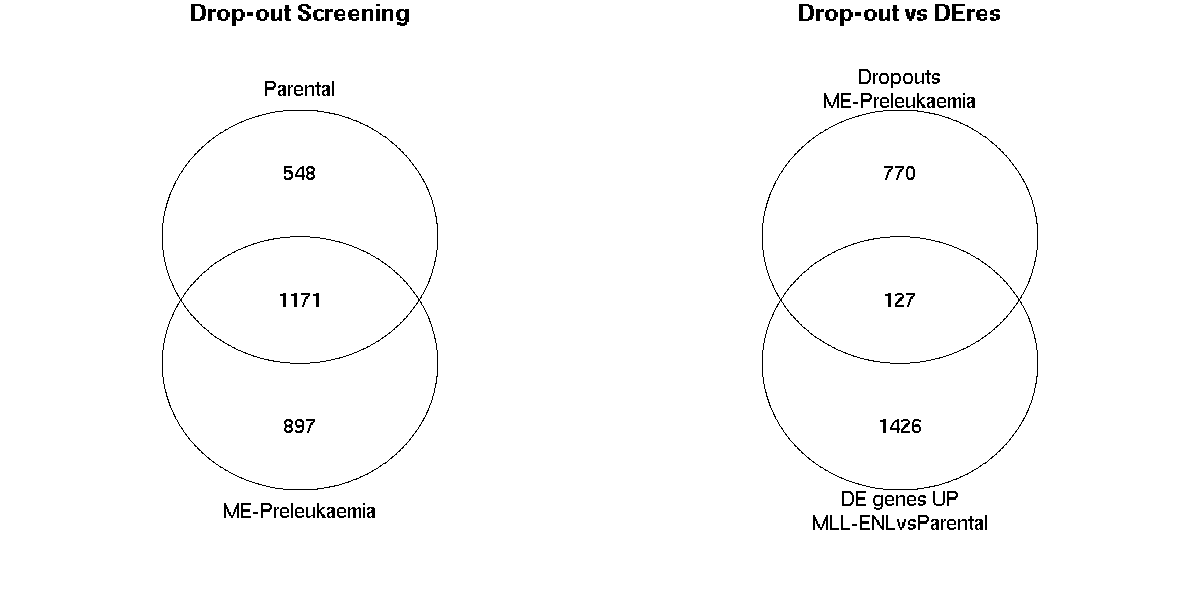

In [178]:
Hoxb8_D6 <- read.table("./newscd/CRISPR_screening_results/HoxB8_D6_vs_Ctrl.gene_summary.txt", header=T)
Hoxb8_D10 <- read.table("./newscd/CRISPR_screening_results/HoxB8_D10_vs_Ctrl.gene_summary.txt", header=T)
Parental_D6 <- read.table("./newscd/CRISPR_screening_results/HOXB8_D6_vs_Ctrl.gene_summary.txt", header=T)
Parental_D10 <- read.table("./newscd/CRISPR_screening_results/HOXB8_D10_vs_Ctrl.gene_summary.txt", header=T)
ME_D6 <- read.table("./newscd/CRISPR_screening_results/MLL_ENL_day6_vs_Ctrl.gene_summary.txt", header=T)
ME_D10 <- read.table("./newscd/CRISPR_screening_results/HOXENL_D10_vs_Ctrl.gene_summary.txt", header=T)
ME_D12 <- read.table("./newscd/CRISPR_screening_results/HOXENL_D12_vs_Ctrl.gene_summary.txt", header=T)

## Hoxb8_D6 u Parental_D6 and Hoxb8_D10 U Parental_D10
Hoxb8_Parental_D6 <- union(Hoxb8_D6$id[Hoxb8_D6$neg.fdr < 0.25], Parental_D6$id[Parental_D6$neg.fdr < 0.25]) # 950, 825 -> 1123
Hoxb8_Parental_D10 <- union(Hoxb8_D10$id[Hoxb8_D10$neg.fdr < 0.25], Parental_D10$id[Parental_D10$neg.fdr < 0.25]) # 1149, 1159 -> 1440

## Hoxb8_Parental U and ME U
Hoxb8_Parental <- Reduce("union", list(Hoxb8_Parental_D6,Hoxb8_Parental_D10)) #1719
ME <- Reduce("union", list(ME_D6$id[ME_D6$neg.fdr < 0.25], ME_D10$id[ME_D10$neg.fdr < 0.25], ME_D12$id[ME_D12$neg.fdr < 0.25])) # 2068

## Intersect these two
require(gplots)
par(mfrow=c(1,2), mar=c(1,0,1,0)+0.1)
venn(list(`ME-Preleukaemia`=ME, `Parental`=Hoxb8_Parental))
title("Drop-out Screening")

IL3_MLLENL1vsParental <- readRDS("./newscd/DEres_IL3_MLLENL1vsParental.rds")
GL_IL3 <- IL3_MLLENL1vsParental$upGene
ME_unique <- setdiff(ME, Hoxb8_Parental)
venn(list(`DE genes UP\nMLL-ENLvsParental`=GL_IL3,`Dropouts\nME-Preleukaemia`=ME_unique))
title("Drop-out vs DEres")

#### Here save the overlaps between Drop-out screening and Differenital expression results
#write.table(intersect(GL_IL3, ME_unique), "Crispr_intersect_MEpre_DEIL3MLL1vsCtrup_new.txt", quote=F, row.names=F, col.names=F, sep="\t")

### Figure 5Ciii

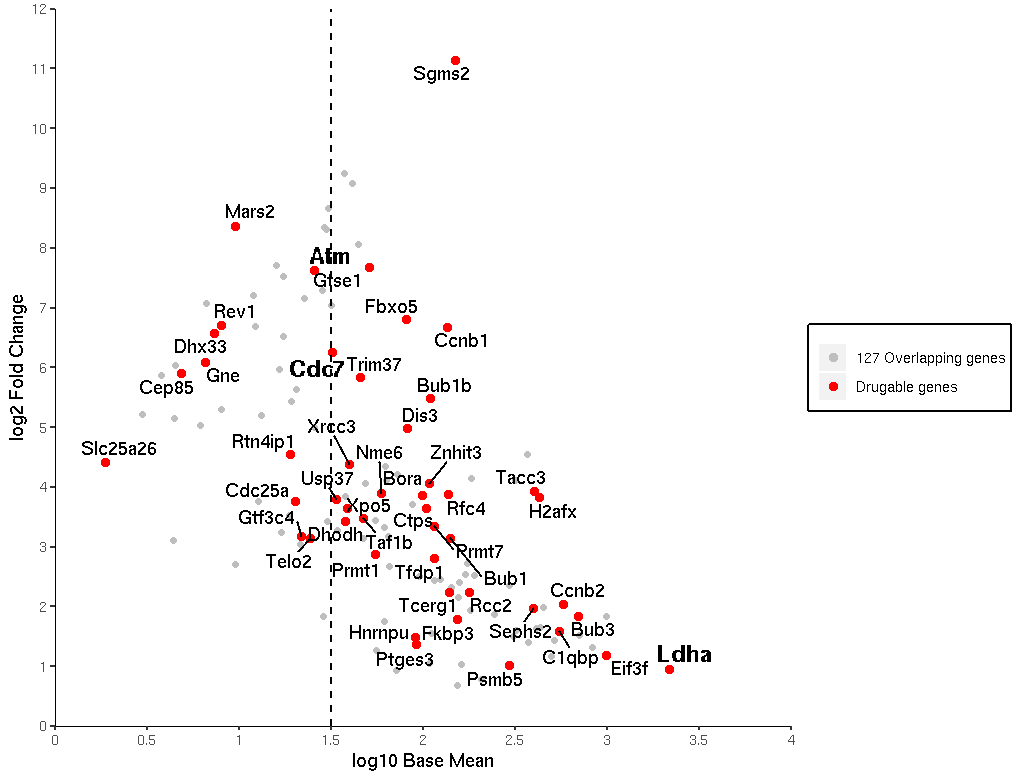

In [187]:
options(repr.plot.width=8.5, repr.plot.height=6.5)
DrugL1 <- toupper(as.character(read.csv("./newscd/Crispr_intersect_MEpre_DEIL3MLL1vsCtrup_new.txt", header=F)[,1])) #127
DrugL2 <- unique(toupper(read.csv("./newscd/dgidb_export_2019-11-22.tsv",sep="\t")[,1])) #47
DrugL3 <- c("ATM", "CDC7", "LDHA")

filterGene(scd3) <- FALSE
DrugL <- Reduce("union", list(DrugL1, DrugL2, DrugL3))
DrugL <- intersect(DrugL, toupper(fData(scd3)[,2])) #135
DrugL <- fData(scd3)[match(DrugL, toupper(fData(scd3)[,2])),2]
filterGene(scd3) <- TRUE
DrugDF <- data.frame(FC=IL3_MLLENL1vsParental$DESeq$log2FoldChange[match(DrugL, IL3_MLLENL1vsParental$DESeq$GN)], mean=log10(IL3_MLLENL1vsParental$DESeq$baseMean[match(DrugL, IL3_MLLENL1vsParental$DESeq$GN)]), ID=DrugL)

require(ggplot2)
require(ggrepel)
require(ggthemes)
p <- ggplot(DrugDF) + geom_point(aes(mean,FC, color="127 Overlapping genes")) 
p <- p + geom_point(aes(mean, FC, color="Drugable genes"), size=2, data=subset(DrugDF, toupper(ID) %in% DrugL2)) 
p <- p + scale_color_manual(values = c('127 Overlapping genes' = 'grey',  'Drugable genes' = 'red'))
p <- p + geom_text_repel(aes(mean, FC, label=ID), color="black", data=subset(DrugDF, toupper(ID) %in% setdiff(DrugL2, DrugL3)))
p <- p + geom_text_repel(aes(mean, FC, label=ID,fontface=2), color="black", data=subset(DrugDF, toupper(ID) %in% DrugL3), cex=5)
p <- p + xlab("log10 Base Mean") + ylab("log2 Fold Change")
p <- p + theme(axis.line = element_line(size = 0.1, colour = "black"),
               panel.background = element_rect(fill = "white"),
               legend.box.background = element_rect(color="black", size=1),
               legend.title = element_blank())
p <- p + geom_vline(xintercept=1.5, linetype='dashed')
p <- p + scale_x_continuous(breaks = seq(0,4,0.5),labels=c(0,0.5,1,1.5,2,2.5,3,3.5,4), limits = c(0,4), expand = c(0,0))
p <- p + scale_y_continuous(breaks = seq(0,12,1), limits = c(0,12), expand = c(0,0))
p

## Supplementary Figures

### Supp Figure 2Bi

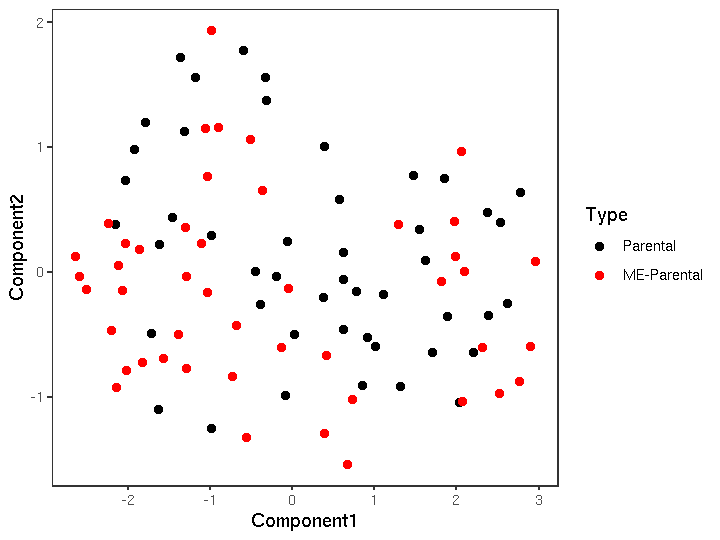

In [198]:
scd_sub1 <- readRDS("./newscd/scd_sub1.rds")

options(repr.plot.width=6, repr.plot.height=4.5)
#### Due to the seed difference, the umap does not look exactly the same 
#### Here we provided the coordinates that used in the paper
#require(umap)
#set.seed(0)
#umap_sub1 <- umap(scd_sub1@pca@eigenvectors[,1:20])
umap_sub1 <- readRDS('./newscd/umap_scd_sub1.rds')
p <- plotPCA1(scd_sub1, reduceMethod = "none", Co=umap_sub1$layout, colorby = "Combined", lv=c("Parental", "ME-Parental"))
p <-  p + theme_bw() + theme(panel.grid = element_blank())
p <- p + scale_color_manual(values=c("black", "red"))
p 

### Supp Figure 2Bii

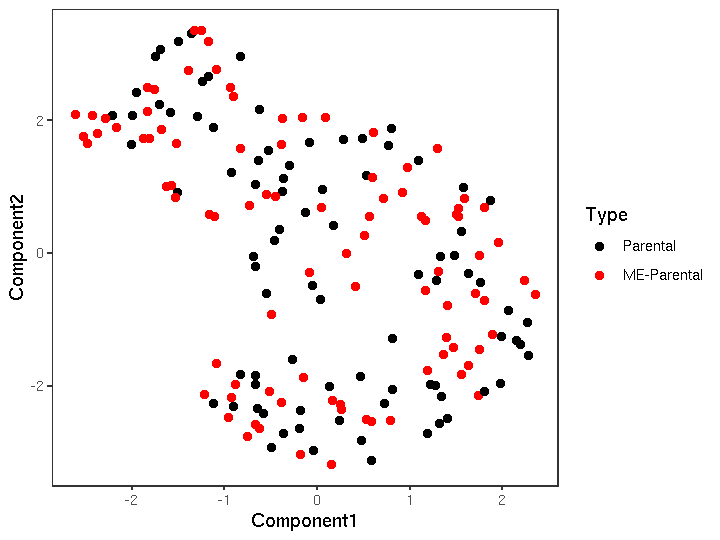

In [199]:
scd_sub2 <- readRDS("./newscd/scd_sub2.rds")

#### Due to the seed difference, the umap does not look exactly the same 
#### Here we provided the coordinates that used in the paper
#require(umap)
#set.seed(0)
#umap_sub2 <- umap(scd_sub2@pca@eigenvectors[,1:20])
umap_sub2 <- readRDS('./newscd/umap_scd_sub2.rds')
p <- plotPCA1(scd_sub2, reduceMethod = "none", Co=umap_sub2$layout, colorby = "Combined", lv=c("Parental", "ME-Parental"))
p <-  p + theme_bw() + theme(panel.grid = element_blank())
p <- p + scale_color_manual(values=c("black", "red"))
p 

### Supp Figure 4Ai, Figure 4Aii and Figure 4Aiii

 [1] "Flt3L_Day7_ME-Parental"  "Flt3L_Day7_Parental"    
 [3] "GM-CSF_Day7_ME-Parental" "GM-CSF_Day7_Parental"   
 [5] "IL3_Day7_MLL-ENL1"       "IL3_Day7_MLL-ENL2"      
 [7] "IL3_Day7_Parental"       "ME-Parental"            
 [9] "ME-Preleukaemia"         "MLLENL-BM"              
[11] "Parental"               


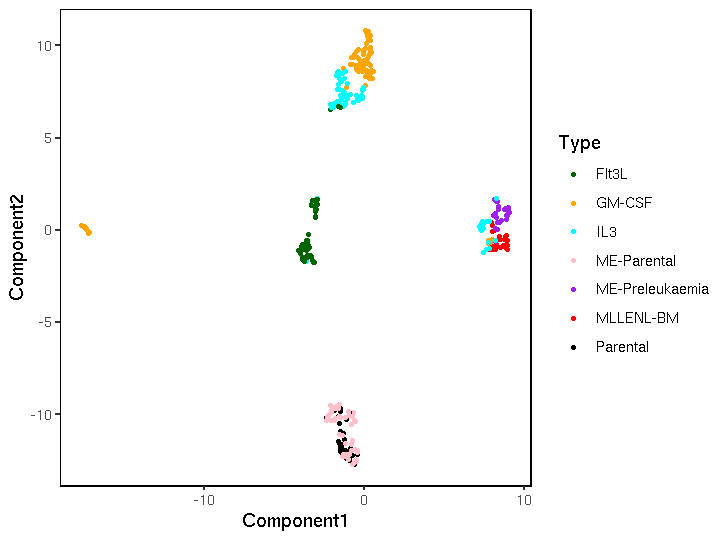

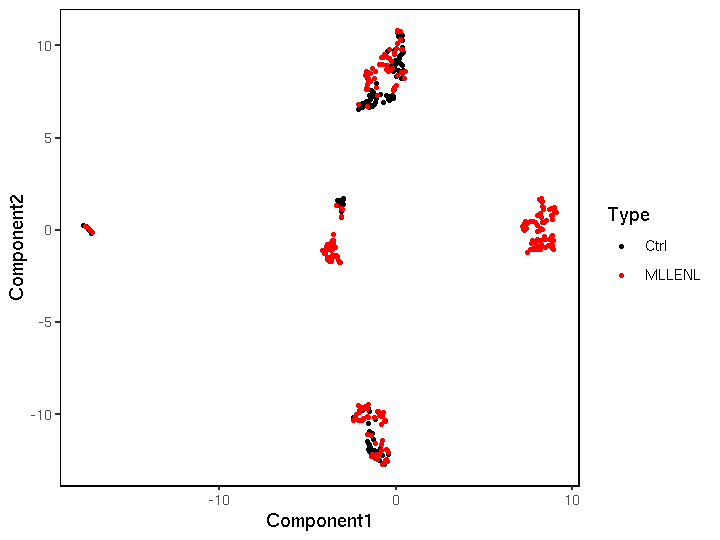

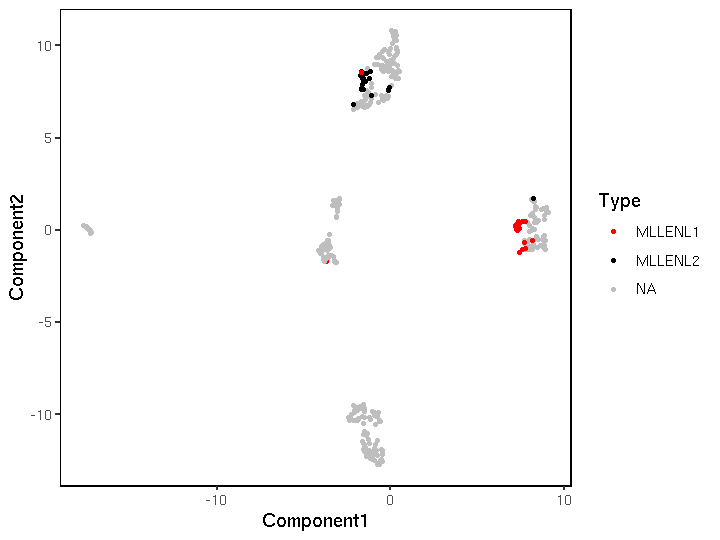

In [221]:
scd_sub6 <- readRDS('./newscd/scd_sub6.rds')

## Try projection
pca1 <- prcomp(t(exprs(scd_sub6)[,pData(scd_sub6)$Batch=="B2"]))
pca2 <- scale(t(exprs(scd_sub6)[,pData(scd_sub6)$Batch=="B1"]), pca1$center, pca1$scale) %*% pca1$rotation

pca_new <- rbind(pca2, pca1$x)

#### Due to the seed difference, the umap does not look exactly the same 
#### Here we provided the coordinates that used in the paper
#set.seed(0)
#custom.settings = umap.defaults
#custom.settings$n_neighbors = 15
#umap_sub6 <- umap(pca_new[,1:20], config = custom.settings)
umap_sub6 <- readRDS('./newscd/umap_scd_sub6.rds')

con1 <- as.factor(as.character(pData(scd_sub6)$Combined))
lv_con1 <- levels(con1)
print(lv_con1)
levels(con1) <- c("Flt3L", "Flt3L", "GM-CSF",
                  "GM-CSF", "IL3", "IL3",
                  "IL3", "ME-Parental",
                  "ME-Preleukaemia", "MLLENL-BM", "Parental")

scd_sub6 <- addPheno(scd_sub6, data.frame(con1=con1, row.names=pData(scd_sub6)$SLX))

p <- plotPCA1(scd_sub6, reduceMethod = "none", Co=umap_sub6$layout, colorby = "con1", theme = "bw", point.size = 1)
p <- p + scale_color_manual(values=c("dark green", "orange", "cyan","pink", "purple","red", "black"))
p

con2 <- as.factor(as.character(pData(scd_sub6)$Combined))
lv_con2 <- levels(con2)
levels(con2) <- c("MLLENL", "Ctrl", "MLLENL",
                  "Ctrl", "MLLENL", "MLLENL",
                  "Ctrl", "MLLENL", "MLLENL",
                  "MLLENL", "Ctrl")
scd_sub6 <- addPheno(scd_sub6, data.frame(con2=con2, row.names=pData(scd_sub6)$SLX))

p <- plotPCA1(scd_sub6, reduceMethod = "none", Co=umap_sub6$layout, colorby = "con2", theme = "bw", point.size = 1)
p <- p + scale_color_manual(values=c("black", "red"))
p

con3 <- as.factor(as.character(pData(scd_sub6)$Combined))
lv_con3 <- levels(con3)
levels(con3) <- c("NA", "NA", "NA",
                  "NA", "MLLENL1", "MLLENL2",
                  "NA", "NA", "NA",
                  "NA", "NA")
scd_sub6 <- addPheno(scd_sub6, data.frame(con3=con3, row.names=pData(scd_sub6)$SLX))

p <- plotPCA1(scd_sub6, reduceMethod = "none", Co=umap_sub6$layout, colorby = "con3", theme = "bw", point.size = 1)
p <- p + scale_color_manual(values=c("red", "black", "grey"))
p


### Supp Figure 4C

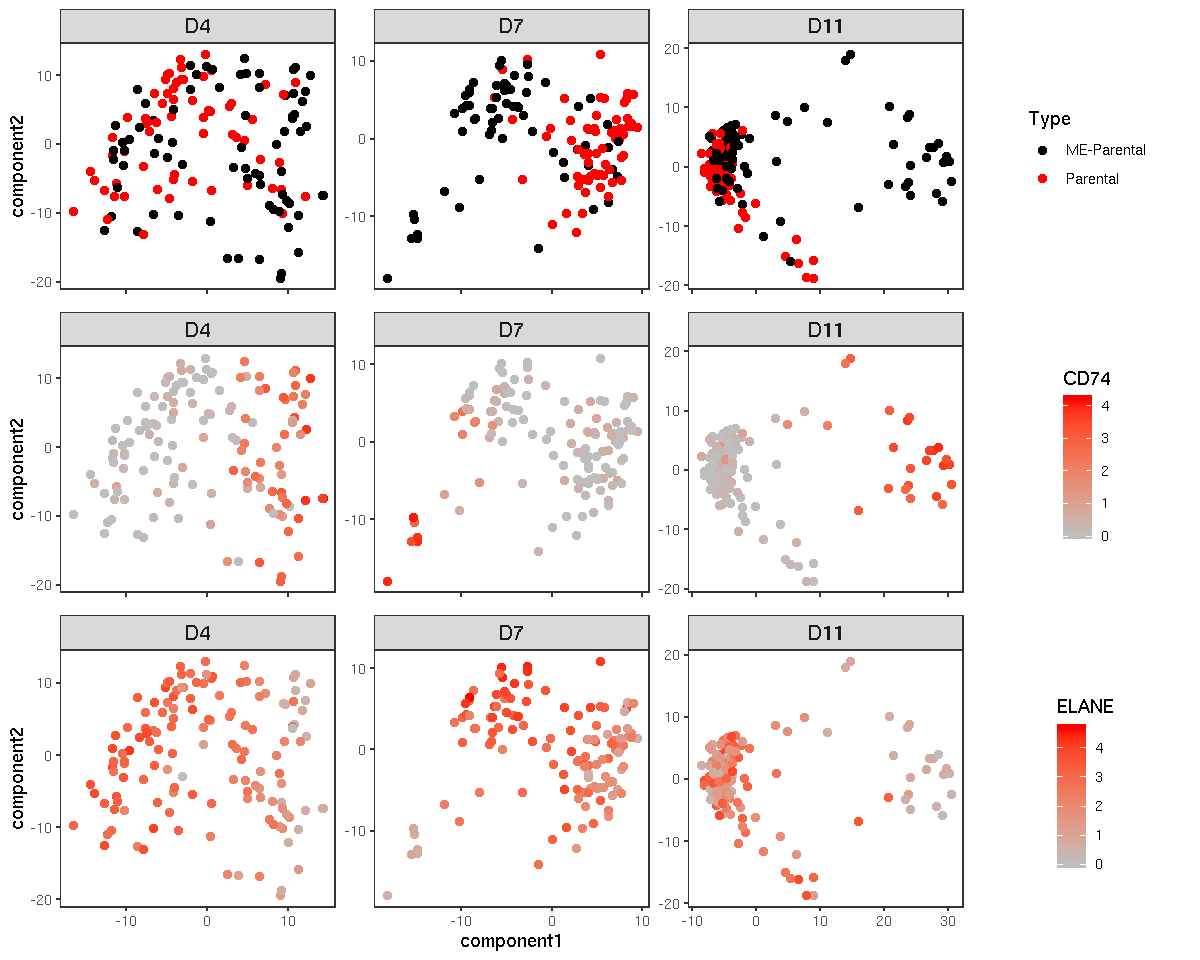

In [242]:
options(repr.plot.width=10, repr.plot.height=8)
require(gridExtra)
require(grid)

scd_sub3 <- readRDS('./newscd/scd_sub3.rds')
scd_sub4 <- readRDS('./newscd/scd_sub4.rds')
scd_sub5 <- readRDS('./newscd/scd_sub5.rds')

scd_sub345 <- list(scd_sub3, scd_sub4, scd_sub5)
Days <- c("D4", "D7", "D11")
pca_all <- do.call("rbind", lapply(1:3, function(x){
  df_sub <- cbind(scd_sub345[[x]]@pca@eigenvectors[,1:2], as.character(pData(scd_sub345[[x]])$Condition), Days[x])
  exp_val <- getExp(scd_sub345[[x]], id=c("Elane", "Cd74"))
  df_sub <- cbind(df_sub, t(exp_val))
  return(df_sub)
}))
b7_df <- data.frame(component1=as.numeric(pca_all[,1]), component2=as.numeric(pca_all[,2]), Type=pca_all[,3], Day=pca_all[,4], CD74=as.numeric(pca_all[,5]), ELANE=as.numeric(pca_all[,6]))
b7_df$Day <- factor(b7_df$Day, levels = Days)
p1 <- ggplot(b7_df, aes(x=component1, y=component2))+geom_point(aes(color=Type), size=2)+facet_wrap(~Day, scales = "free")
p1 <- p1 + theme_bw() + theme(panel.grid = element_blank(), axis.text.x = element_blank(), axis.title.x=element_blank(), strip.text=element_text(size=12)) 
p1 <- p1 + scale_color_manual(values=c("black", "red"))
p1_leng <- get_legend(p1)
p1 <- p1 + theme(legend.position="none")

p2 <- ggplot(b7_df, aes(x=component1, y=component2))+geom_point(aes(color=CD74), size=2)+facet_wrap(~Day, scales = "free")
p2 <- p2 + theme_bw() + theme(panel.grid = element_blank(), axis.text.x = element_blank(), axis.title.x=element_blank(), strip.text=element_text(size=12)) 
p2 <- p2 + scale_colour_gradient(low = "grey", high = "red")
p2_leng <- get_legend(p2)
p2 <- p2 + theme(legend.position="none")

p3 <- ggplot(b7_df, aes(x=component1, y=component2))+geom_point(aes(color=ELANE), size=2)+facet_wrap(~Day, scales = "free")
p3 <- p3 + theme_bw() + theme(panel.grid = element_blank(), strip.text=element_text(size=12)) 
p3 <- p3 + scale_colour_gradient(low = "grey", high = "red")
p3_leng <- get_legend(p3)
p3 <- p3 + theme(legend.position="none")

grid.arrange(p1,p1_leng, p2,p2_leng, p3,p3_leng, ncol=2, widths=c(3,0.7), heights=c(3,3,3.5))
